# K平均法

## ライブラリのインポート

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 1:].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
print(X)

[[1 19 15 39]
 [1 21 15 81]
 [0 20 16 6]
 [0 23 16 77]
 [0 31 17 40]
 [0 22 17 76]
 [0 35 18 6]
 [0 23 18 94]
 [1 64 19 3]
 [0 30 19 72]
 [1 67 19 14]
 [0 35 19 99]
 [0 58 20 15]
 [0 24 20 77]
 [1 37 20 13]
 [1 22 20 79]
 [0 35 21 35]
 [1 20 21 66]
 [1 52 23 29]
 [0 35 23 98]
 [1 35 24 35]
 [1 25 24 73]
 [0 46 25 5]
 [1 31 25 73]
 [0 54 28 14]
 [1 29 28 82]
 [0 45 28 32]
 [1 35 28 61]
 [0 40 29 31]
 [0 23 29 87]
 [1 60 30 4]
 [0 21 30 73]
 [1 53 33 4]
 [1 18 33 92]
 [0 49 33 14]
 [0 21 33 81]
 [0 42 34 17]
 [0 30 34 73]
 [0 36 37 26]
 [0 20 37 75]
 [0 65 38 35]
 [1 24 38 92]
 [1 48 39 36]
 [0 31 39 61]
 [0 49 39 28]
 [0 24 39 65]
 [0 50 40 55]
 [0 27 40 47]
 [0 29 40 42]
 [0 31 40 42]
 [0 49 42 52]
 [1 33 42 60]
 [0 31 43 54]
 [1 59 43 60]
 [0 50 43 45]
 [1 47 43 41]
 [0 51 44 50]
 [1 69 44 46]
 [0 27 46 51]
 [1 53 46 46]
 [1 70 46 56]
 [1 19 46 55]
 [0 67 47 52]
 [0 54 47 59]
 [1 63 48 51]
 [1 18 48 59]
 [0 43 48 50]
 [0 68 48 48]
 [1 19 48 59]
 [0 32 48 47]
 [1 70 49 55]
 [0 47 49 42

## 最適なクラスターの数を見つけるためのエルボー法の実行

C:\Users\406429\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

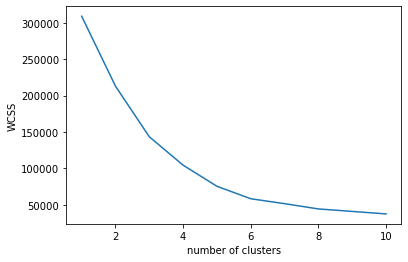

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")

## モデルの訓練

In [20]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## クラスターの可視化

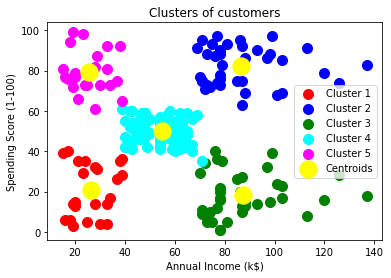

In [23]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 2], X[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()